In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = r"/content/drive/MyDrive/Bone_Fracture_Classification/dataset/Bone Break Classification/Bone Break Classification/"

In [4]:
fracture_label = ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture',
                   'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']

In [5]:
import pandas as pd
import os
img_list = []
label_list = []
for label in fracture_label:
    base_path = dataset_path + label
    for subfolder in ['Train', 'Test']:
        sub_path = base_path + '/' + subfolder
        for img_file in os.listdir(sub_path):
            img_path = sub_path + '/' + img_file
            img_list.append(img_path)
            label_list.append(label)


df = pd.DataFrame({'img':img_list, 'label':label_list})

In [6]:
df.head()

,img,label
0,/content/drive/MyDrive/Bone_Fracture_Classific...,Avulsion fracture
1,/content/drive/MyDrive/Bone_Fracture_Classific...,Avulsion fracture
2,/content/drive/MyDrive/Bone_Fracture_Classific...,Avulsion fracture
3,/content/drive/MyDrive/Bone_Fracture_Classific...,Avulsion fracture
4,/content/drive/MyDrive/Bone_Fracture_Classific...,Avulsion fracture


In [7]:
df['label'].value_counts()

,count
label,
Fracture Dislocation,156
Comminuted fracture,148
Pathological fracture,134
Avulsion fracture,123
Greenstick fracture,122
Hairline Fracture,111
Spiral Fracture,86
Oblique fracture,85
Impacted fracture,84


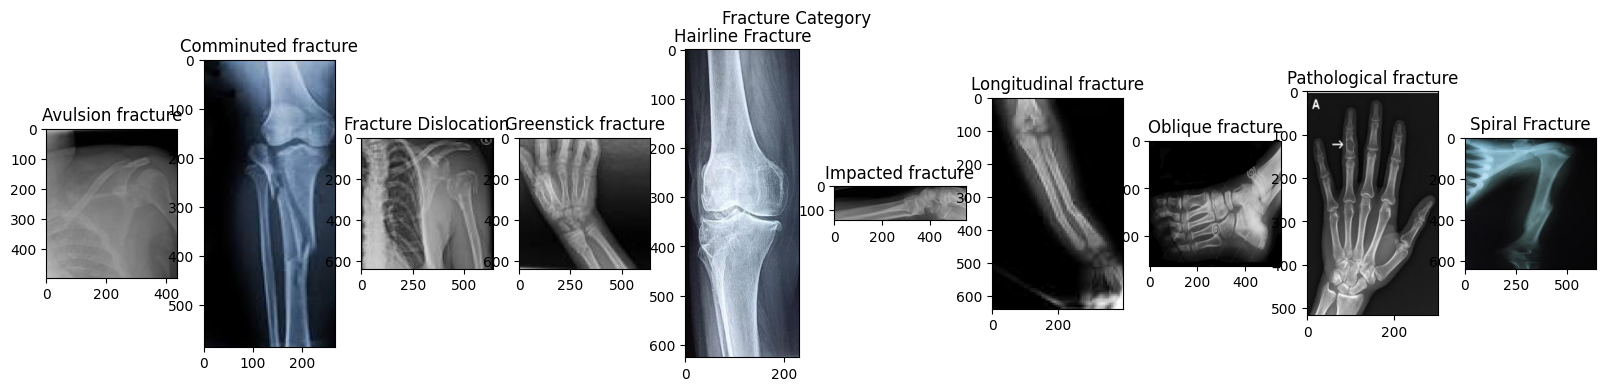

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=len(fracture_label), figsize=(20,4))
fig.suptitle('Fracture Category')
random_num = 12
for i,label in enumerate(fracture_label):
    ax[i].set_title(label)
    ax[i].imshow(plt.imread(df[df['label']==label]['img'].iloc[random_num]))

In [9]:
plt.imread(df['img'][0]).shape

(640, 232, 3)

## **Data preprocessing**

In [10]:
# Create a dataframe for mapping label
df_labels = {
    'Avulsion fracture': 0, 'Comminuted fracture': 1, 'Fracture Dislocation': 2, 'Greenstick fracture': 3,
    'Hairline Fracture': 4, 'Impacted fracture': 5, 'Longitudinal fracture': 6, 'Oblique fracture': 7,
    'Pathological fracture': 8, 'Spiral Fracture': 9
}
# Encode
df['encode_label'] = df['label'].map(df_labels)
df.head()

,img,label,encode_label
0,/content/drive/MyDrive/Bone_Fracture_Classific...,Avulsion fracture,0
1,/content/drive/MyDrive/Bone_Fracture_Classific...,Avulsion fracture,0
2,/content/drive/MyDrive/Bone_Fracture_Classific...,Avulsion fracture,0
3,/content/drive/MyDrive/Bone_Fracture_Classific...,Avulsion fracture,0
4,/content/drive/MyDrive/Bone_Fracture_Classific...,Avulsion fracture,0


In [11]:
import cv2
X = []
for img in df['img']:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224, 224))
    img = img/255
    X.append(img)

In [12]:
import numpy as np

X = np.array(X)
y = np.array(df['encode_label'])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [14]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
for layer in base_model.layers:
    layer.trainable = False
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

In [16]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(fracture_label), activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 13,504,778 (51.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [17]:
model.compile(
  optimizer="adam",
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 34s 695ms/step - acc: 0.1199 - loss: 2.6739 - val_acc: 0.1268 - val_loss: 2.3012
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - acc: 0.1468 - loss: 2.2980 - val_acc: 0.1268 - val_loss: 2.2986
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - acc: 0.1376 - loss: 2.2908 - val_acc: 0.1268 - val_loss: 2.2973
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - acc: 0.1172 - loss: 2.2842 - val_acc: 0.1268 - val_loss: 2.2970
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - acc: 0.1433 - loss: 2.2825 - val_acc: 0.1268 - val_loss: 2.2970
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - acc: 0.1422 - loss: 2.2828 - val_acc: 0.1268 - val_loss: 2.2983
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - acc: 0.1418 - loss: 2.2764 - val_acc: 0.1268 - val_loss: 2.3007
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - acc: 0.1500 - loss: 2.2643 - val_acc: 0.1268 - val_loss: 2.3004
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/s

In [18]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - acc: 0.1526 - loss: 2.2821


[2.2802062034606934, 0.1462264209985733]

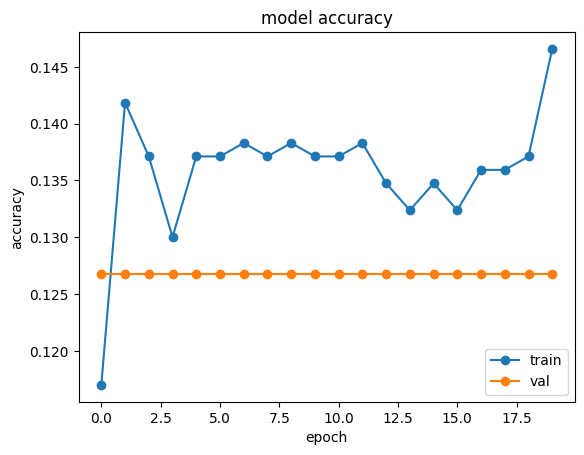

In [19]:
plt.plot(history.history['acc'], marker='o')
plt.plot(history.history['val_acc'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

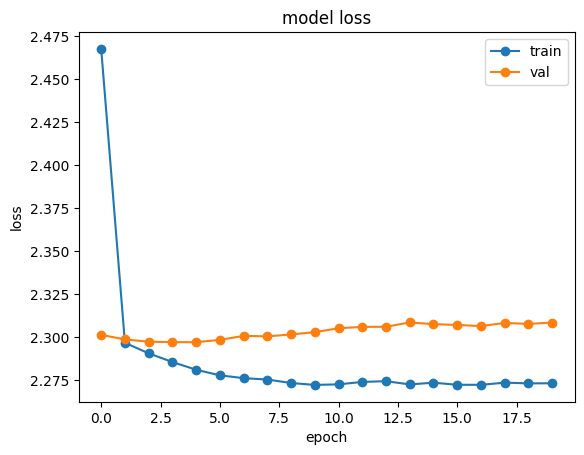

In [20]:
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## MobileNetV2

In [21]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, GlobalAveragePooling2D

model_mobile = Sequential([
    Input(shape=(224, 224, 3)),
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [23]:
model_mobile.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [24]:
history = model_mobile.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 454ms/step - acc: 0.1310 - loss: 2.5311 - val_acc: 0.2113 - val_loss: 2.1499
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - acc: 0.2930 - loss: 2.0446 - val_acc: 0.3099 - val_loss: 2.0426
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.3560 - loss: 1.8959 - val_acc: 0.3099 - val_loss: 1.8785
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.4042 - loss: 1.7543 - val_acc: 0.3521 - val_loss: 1.9512
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.5053 - loss: 1.5136 - val_acc: 0.3521 - val_loss: 1.7988
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.5050 - loss: 1.4928 - val_acc: 0.4085 - val_loss: 1.7958
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.5989 - loss: 1.2810 - val_acc: 0.3803 - val_loss: 1.8962
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.5554 - loss: 1.2912 - val_acc: 0.3803 - val_loss: 1.7662
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.63

In [25]:
model_mobile.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 606ms/step - acc: 0.3579 - loss: 2.1642


[2.0561182498931885, 0.37264150381088257]

In [26]:
model_mobile.save("/content/drive/MyDrive/Bone_Fracture_Classification/notebook/mobilenet_fracture_model_simple.keras")

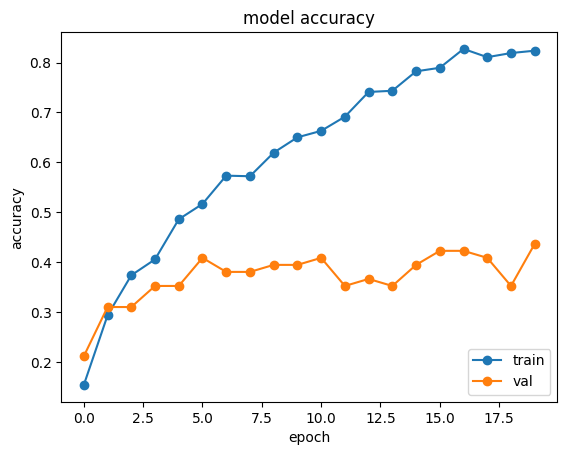

In [27]:
plt.plot(history.history['acc'], marker='o')
plt.plot(history.history['val_acc'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

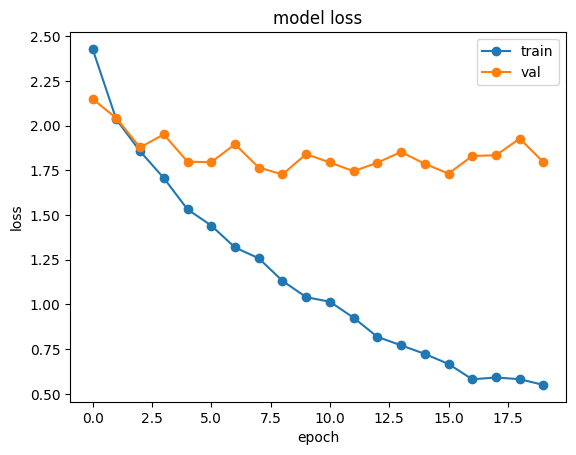

In [28]:
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Data Augmentation

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [30]:
model_mobile.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model_mobile.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_val, y_val)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 666ms/step - acc: 0.5612 - loss: 1.2926 - val_acc: 0.4507 - val_loss: 1.8933
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - acc: 0.5961 - loss: 1.2155 - val_acc: 0.4085 - val_loss: 1.7602
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - acc: 0.5913 - loss: 1.1951 - val_acc: 0.4366 - val_loss: 1.7876
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 355ms/step - acc: 0.6108 - loss: 1.1678 - val_acc: 0.4366 - val_loss: 1.7719
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 355ms/step - acc: 0.6181 - loss: 1.1153 - val_acc: 0.3803 - val_loss: 1.8054
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - acc: 0.6513 - loss: 1.0511 - val_acc: 0.4366 - val_loss: 1.7594
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - acc: 0.6507 - loss: 0.9969 - val_acc: 0.4085 - val_loss: 1.8084
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - acc: 0.6638 - loss: 0.9923 - val_acc: 0.3662 - val_loss: 1.7906
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/st

In [31]:
model_mobile.save('/content/drive/MyDrive/Bone_Fracture_Classification/notebook/mobilenet_fracture_model_da.keras')

In [32]:
model_mobile.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - acc: 0.4407 - loss: 2.0190


[1.9855031967163086, 0.4386792480945587]

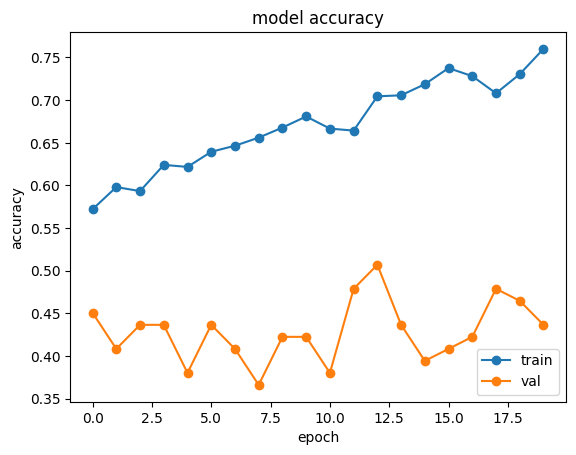

In [33]:
plt.plot(history.history['acc'], marker='o')
plt.plot(history.history['val_acc'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

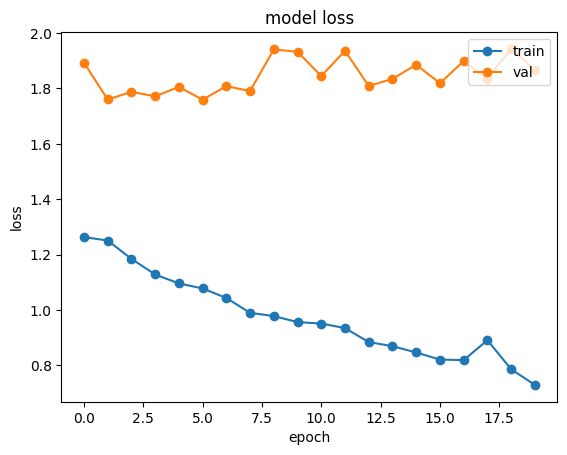

In [34]:
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Unfreeze

In [35]:
import tensorflow as tf
base_model.trainable = True  # Allow training
for layer in base_model.layers[:-50]:
    layer.trainable = False
model_mobile.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [36]:
history_finetune = model_mobile.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_val, y_val)
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 46s 895ms/step - acc: 0.2627 - loss: 3.3346 - val_acc: 0.4507 - val_loss: 1.8511
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - acc: 0.2914 - loss: 2.9118 - val_acc: 0.4648 - val_loss: 1.8674
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - acc: 0.3498 - loss: 2.5508 - val_acc: 0.4648 - val_loss: 1.8931
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 363ms/step - acc: 0.3179 - loss: 2.4437 - val_acc: 0.4789 - val_loss: 1.9031
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 337ms/step - acc: 0.3251 - loss: 2.3401 - val_acc: 0.4225 - val_loss: 1.9099
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 314ms/step - acc: 0.3766 - loss: 2.1014 - val_acc: 0.4507 - val_loss: 1.9195
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - acc: 0.4110 - loss: 1.9526 - val_acc: 0.4507 - val_loss: 1.9270
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 367ms/step - acc: 0.4499 - loss: 1.8339 - val_acc: 0.4225 - val_loss: 1.9309
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 332ms/ste

In [ ]:
model_mobile.evaluate(X_test,y_test)

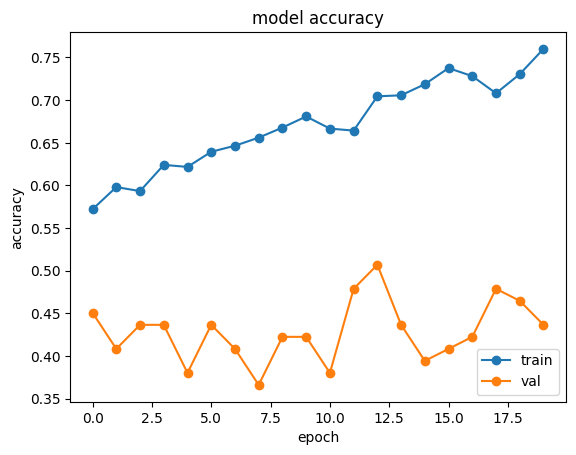

In [37]:
plt.plot(history.history['acc'], marker='o')
plt.plot(history.history['val_acc'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

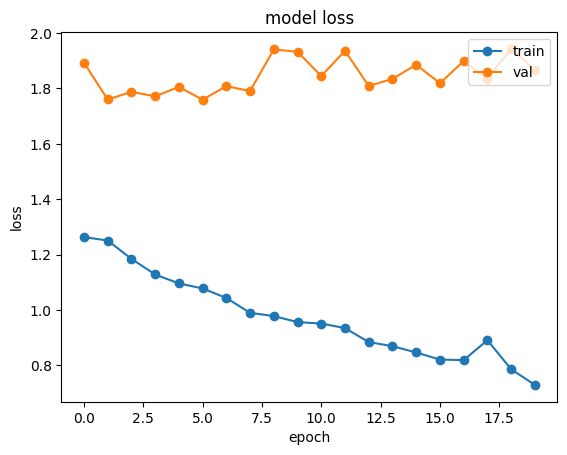

In [38]:
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()